# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1, 1, 1],
       [1, 1, 1]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
#A + B

In [15]:
#A * B

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [24]:
#A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

/home/ukwattat/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


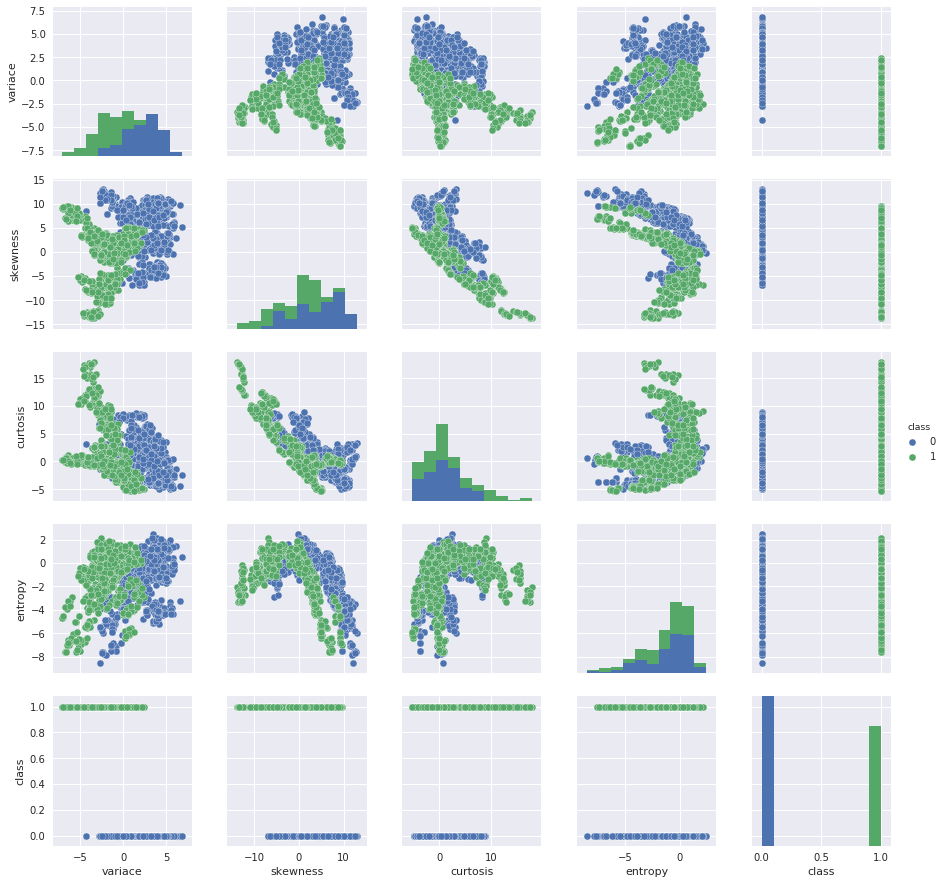

In [29]:
sns.pairplot(df, hue="class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.98689956,  0.99562363,  0.99562363])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 1.5520 - acc: 0.2031     
Epoch 2/10
960/960 [==============================] - 0s - loss: 1.3654 - acc: 0.2073     
Epoch 3/10
960/960 [==============================] - 0s - loss: 1.1974 - acc: 0.2115     
Epoch 4/10
960/960 [==============================] - 0s - loss: 1.0506 - acc: 0.2156     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.9261 - acc: 0.2313     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.8236 - acc: 0.2615     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.7412 - acc: 0.3969     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.6757 - acc: 0.6344     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.6236 - acc: 0.8156     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [36]:
history.history

{'acc': [0.203125,
  0.20729166666666668,
  0.21145833333333333,
  0.21562500000000001,
  0.23125000000000001,
  0.26145833333333335,
  0.39687499999999998,
  0.63437500000000002,
  0.81562500000000004,
  0.89270833333333333],
 'loss': [1.5520253221193949,
  1.365389887491862,
  1.1973764856656393,
  1.050629864136378,
  0.92609257896741226,
  0.82360425988833108,
  0.74124171932538352,
  0.67574727535247803,
  0.6236331105232239,
  0.58176843722661331]}

In [37]:
historydf = pd.DataFrame(history.history, index=history.epoch)

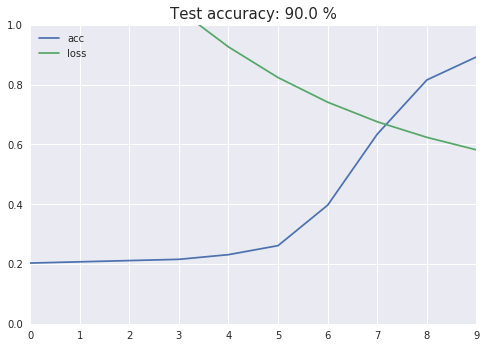

In [38]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [39]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [40]:
historydf = pd.concat(dflist, axis=1)

In [41]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.663542,0.631717,0.535417,0.704864,0.809375,0.470156,0.933333,0.246588
1,0.778125,0.510199,0.740625,0.497910,0.903125,0.312032,0.968750,0.123993
2,0.840625,0.434017,0.814583,0.399312,0.922917,0.245328,0.973958,0.093955
3,0.887500,0.385387,0.860417,0.335781,0.937500,0.204380,0.977083,0.079824
4,0.914583,0.352731,0.904167,0.290572,0.951042,0.176433,0.979167,0.070812
5,0.926042,0.329554,0.926042,0.256682,0.956250,0.156198,0.979167,0.065104
6,0.933333,0.312013,0.938542,0.230613,0.962500,0.141322,0.980208,0.060466
7,0.932292,0.298127,0.950000,0.209860,0.967708,0.129678,0.981250,0.057401
8,0.933333,0.286647,0.956250,0.193109,0.968750,0.120284,0.981250,0.054722
9,0.935417,0.276853,0.960417,0.179227,0.969792,0.112804,0.981250,0.052649


In [42]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [43]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.663542  0.631717  0.535417  0.704864  0.809375  0.470156   
1              0.778125  0.510199  0.740625  0.497910  0.903125  0.312032   
2              0.840625  0.434017  0.814583  0.399312  0.922917  0.245328   
3              0.887500  0.385387  0.860417  0.335781  0.937500  0.204380   
4              0.914583  0.352731  0.904167  0.290572  0.951042  0.176433   
5              0.926042  0.329554  0.926042  0.256682  0.956250  0.156198   
6              0.933333  0.312013  0.938542  0.230613  0.962500  0.141322   
7              0.932292  0.298127  0.950000  0.209860  0.967708  0.129678   
8              0.933333  0.286647  0.956250  0.193109  0.968750  0.120284   
9              0.935417  0.276853  0.960417  0.179227  0.969792  0.112804   

learning_rate      0.50            
metric              acc      loss  
0              0.933333  0.246588  
1              0.968750  0.123993  
2              0.973958  0.093955  
3              0.977083  0.079824  
4              0.979167  0.070812  
5              0.979167  0.065104  
6              0.980208  0.060466  
7              0.981250  0.057401  
8              0.981250  0.054722  
9              0.981250  0.052649

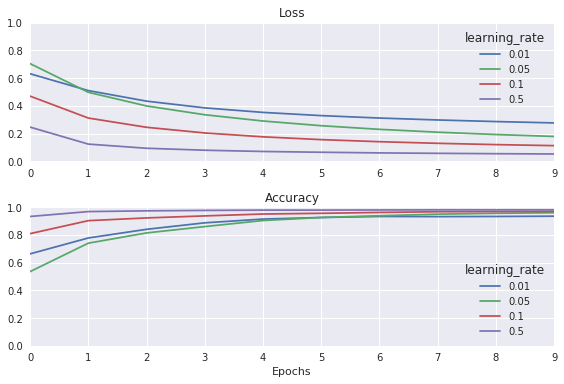

In [44]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [45]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [46]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [47]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.845833  0.390465  0.104167  1.389948  0.288542  1.183119   
1           0.863542  0.370130  0.091667  1.234369  0.312500  1.114312   
2           0.872917  0.353133  0.089583  1.100142  0.333333  1.050224   
3           0.880208  0.338576  0.086458  0.987643  0.360417  0.990494   
4           0.887500  0.325907  0.134375  0.895303  0.398958  0.935103   
5           0.890625  0.314677  0.252083  0.820323  0.413542  0.884024   
6           0.893750  0.304592  0.389583  0.759295  0.440625  0.836971   
7           0.897917  0.295450  0.536458  0.709336  0.461458  0.793857   
8           0.904167  0.287084  0.623958  0.667818  0.486458  0.754405   
9           0.908333  0.279313  0.667708  0.632838  0.509375  0.718320   

batch_size       128            
metric           acc      loss  
0           0.415625  0.790311  
1           0.434375  0.774072  
2           0.454167  0.758987  
3           0.481250  0.744642  
4           0.495833  0.731114  
5           0.516667  0.718299  
6           0.535417  0.706027  
7           0.558333  0.694429  
8           0.585417  0.683347  
9           0.610417  0.672863

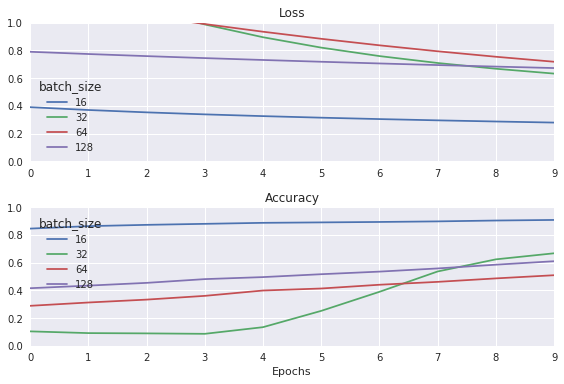

In [48]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [49]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [50]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [51]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

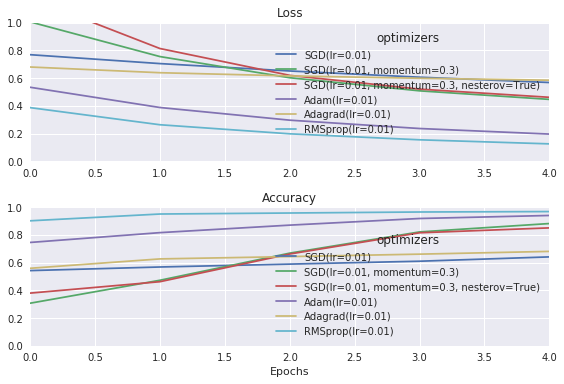

In [52]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [53]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    # if you increase the number of epochs, all should converge
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0) 
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [54]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

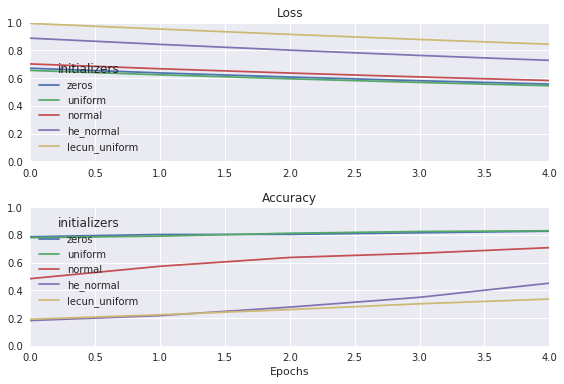

In [55]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [56]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.3329 - acc: 0.9256 - val_loss: 0.2405 - val_acc: 0.9479
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.1743 - acc: 0.9449 - val_loss: 0.1309 - val_acc: 0.9653
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.1061 - acc: 0.9613 - val_loss: 0.0805 - val_acc: 0.9792
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.0749 - acc: 0.9688 - val_loss: 0.0585 - val_acc: 0.9826
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.0589 - acc: 0.9777 - val_loss: 0.0481 - val_acc: 0.9826
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.0490 - acc: 0.9792 - val_loss: 0.0419 - val_acc: 0.9861
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.0447 - acc: 0.9792 - val_loss: 0.0371 - val_acc: 0.9826
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.0407 - acc: 0.9836 - val_l

In [57]:
result

[0.027155663587550803, 0.98786407766990292]

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.layers

In [60]:
inp = model.layers[0].input
out = model.layers[0].output

In [61]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [62]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [63]:
features_function = K.function([inp], [out])

In [64]:
features_function

In [65]:
features_function([X_test])[0].shape

(412, 2)

In [66]:
features = features_function([X_test])[0]

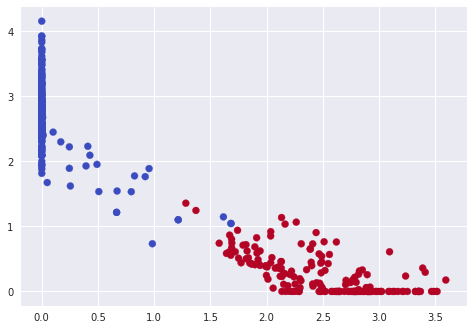

In [67]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [68]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

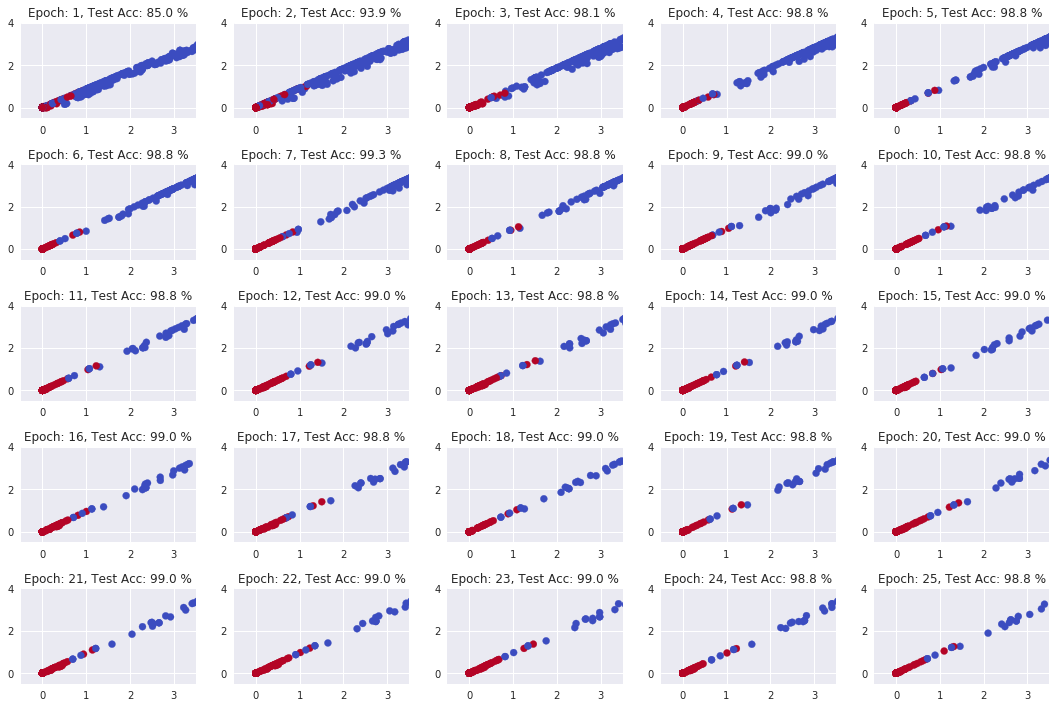

In [69]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [70]:
df = pd.read_csv('../data/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
df['Class'].unique()

array([1, 2, 3])

In [72]:
df_class = pd.get_dummies(df['Class'], prefix='Class')

In [73]:
#df = pd.concat([df, df_class], axis=1)

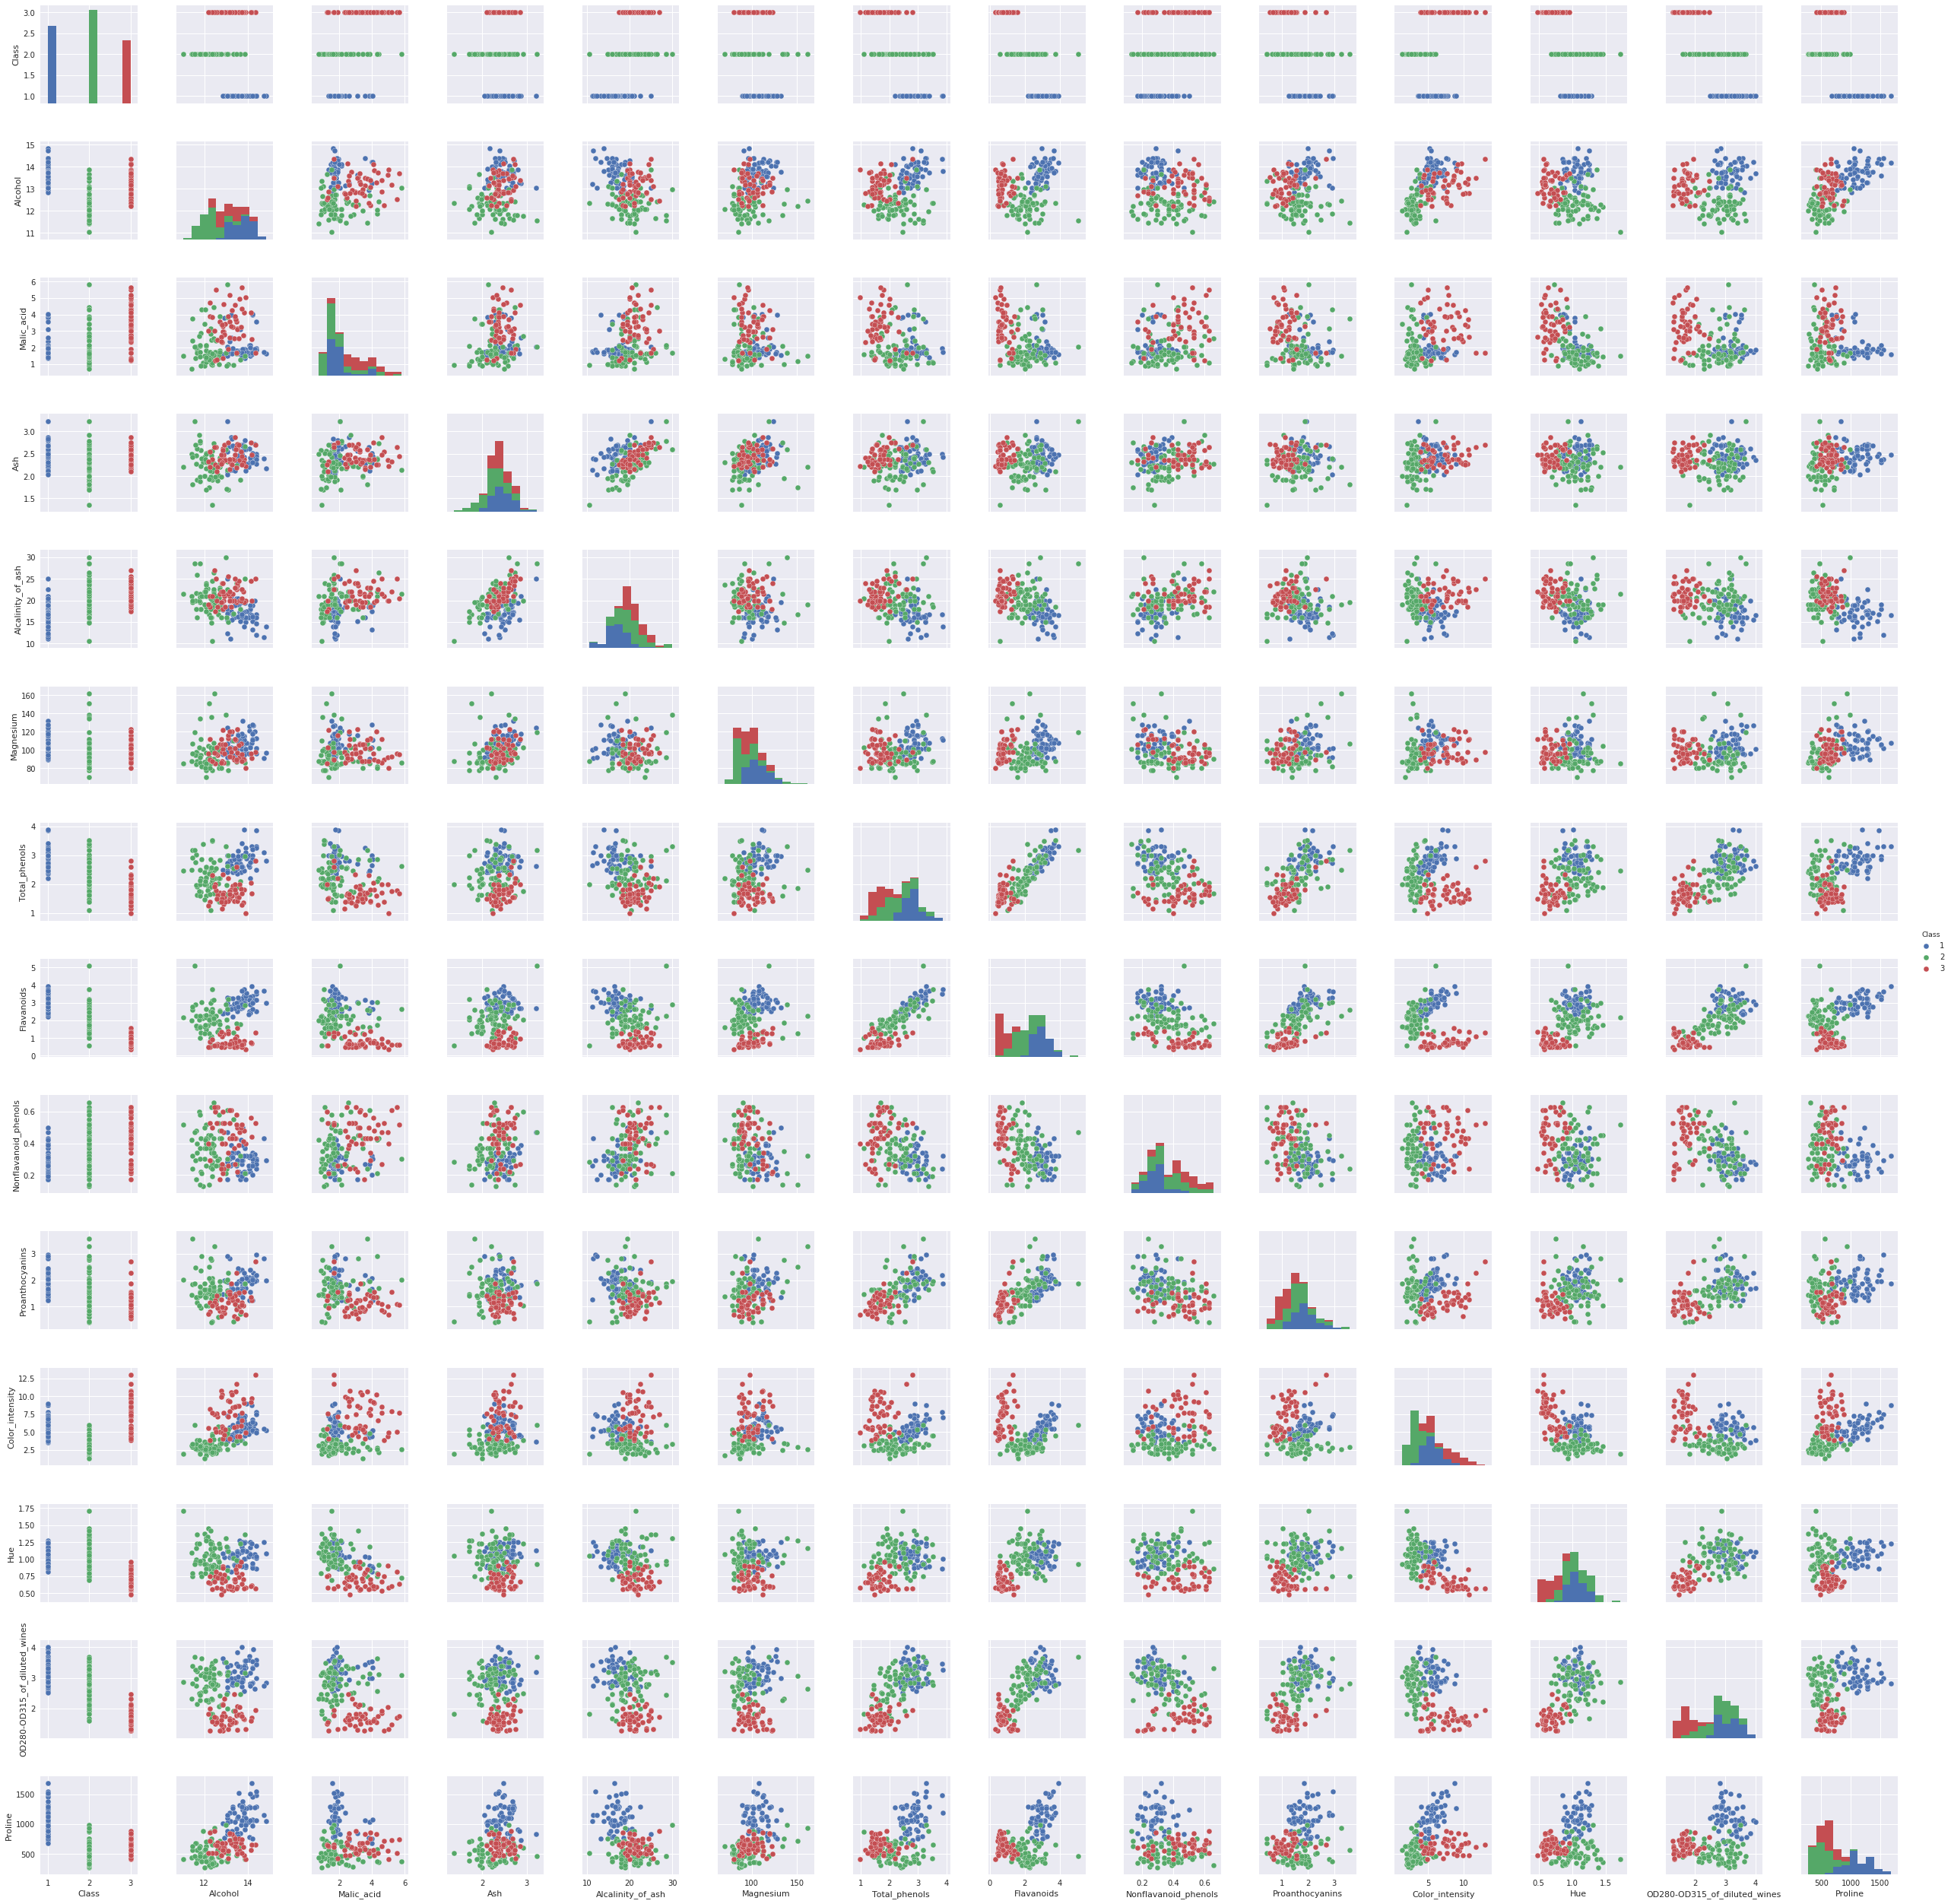

In [74]:
import seaborn as sns
sns.pairplot(df, hue="Class")

In [75]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

sc = StandardScaler()
X = sc.fit_transform(df.drop('Class', axis=1))
y = df_class.values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state = 22)

In [77]:
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)

Train on 113 samples, validate on 29 samples
Epoch 1/20
0s - loss: 0.7160 - acc: 0.6372 - val_loss: 0.0482 - val_acc: 0.9655
Epoch 2/20
0s - loss: 0.0845 - acc: 0.9735 - val_loss: 0.0174 - val_acc: 1.0000
Epoch 3/20
0s - loss: 0.1036 - acc: 0.9823 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 4/20
0s - loss: 0.0085 - acc: 0.9912 - val_loss: 0.0336 - val_acc: 0.9655
Epoch 5/20
0s - loss: 0.0734 - acc: 0.9735 - val_loss: 0.0976 - val_acc: 0.9655
Epoch 6/20
0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.1334 - val_acc: 0.9655
Epoch 7/20
0s - loss: 0.0396 - acc: 0.9912 - val_loss: 0.1519 - val_acc: 0.9655
Epoch 8/20
0s - loss: 0.0401 - acc: 0.9912 - val_loss: 0.2028 - val_acc: 0.9655
Epoch 9/20
0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3256 - val_acc: 0.9655
Epoch 10/20
0s - loss: 3.5836e-04 - acc: 1.0000 - val_loss: 0.4187 - val_acc: 0.9655
Epoch 11/20
0s - loss: 1.9977e-04 - acc: 1.0000 - val_loss: 0.4852 - val_acc: 0.9655
Epoch 12/20
0s - loss: 1.2035e-04 - acc: 1.0000 - val_loss: 0.526

In [79]:
y_pred = model.predict(X_test)

In [80]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
accuracy_score(y_test_class, y_pred_class)

1.0

In [83]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        36



In [84]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 9,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 11]])

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [85]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,), kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(X, y, batch_size=8, epochs=25, verbose=2, validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/25
0s - loss: 0.6564 - acc: 0.7676 - val_loss: 1.3916 - val_acc: 0.2778
Epoch 2/25
0s - loss: 0.1877 - acc: 0.9648 - val_loss: 1.4549 - val_acc: 0.5556
Epoch 3/25
0s - loss: 0.1220 - acc: 0.9718 - val_loss: 0.4596 - val_acc: 0.8333
Epoch 4/25
0s - loss: 0.1782 - acc: 0.9366 - val_loss: 0.4361 - val_acc: 0.9444
Epoch 5/25
0s - loss: 0.0546 - acc: 0.9859 - val_loss: 0.2948 - val_acc: 0.9444
Epoch 6/25
0s - loss: 0.0670 - acc: 0.9930 - val_loss: 0.1377 - val_acc: 0.9722
Epoch 7/25
0s - loss: 0.0180 - acc: 1.0000 - val_loss: 0.0920 - val_acc: 0.9722
Epoch 8/25
0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0940 - val_acc: 0.9722
Epoch 9/25
0s - loss: 0.0106 - acc: 1.0000 - val_loss: 0.0957 - val_acc: 0.9722
Epoch 10/25
0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.0986 - val_acc: 0.9722
Epoch 11/25
0s - loss: 0.0074 - acc: 1.0000 - val_loss: 0.0974 - val_acc: 0.9722
Epoch 12/25
0s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.0940 - val_acc:

In [87]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp], [out])
features = features_function([X])[0]
features.shape

(178, 2)

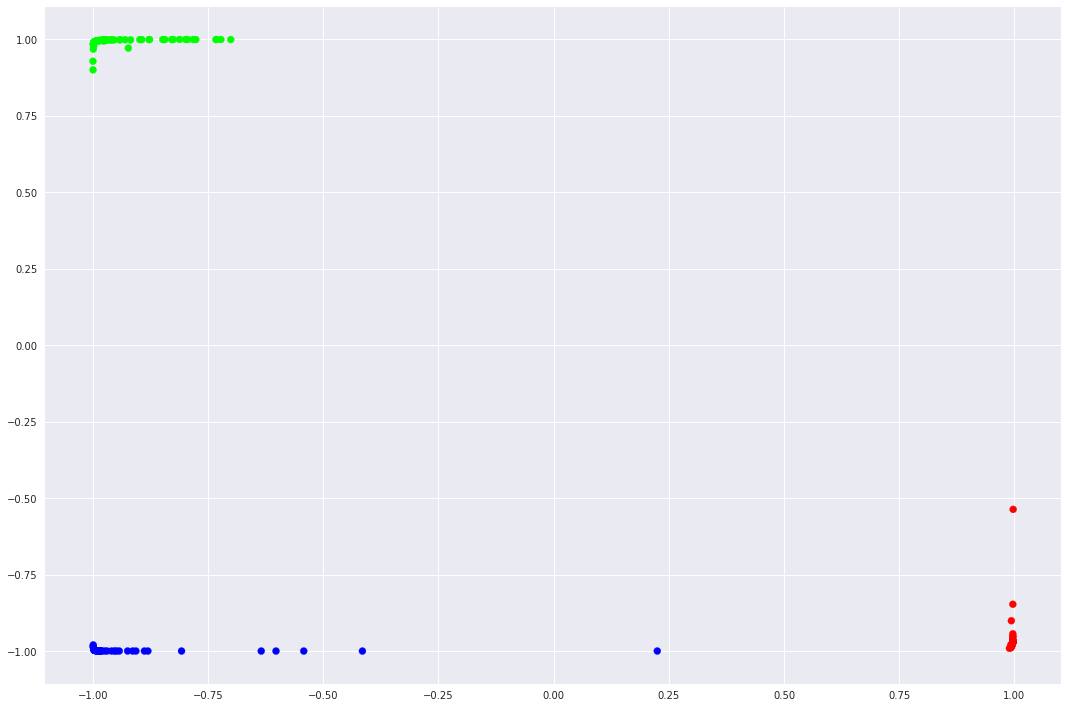

In [88]:
plt.figure(figsize=(15,10))
plt.scatter(features[:, 0], features[:, 1], c=y, cmap='coolwarm')
plt.tight_layout()

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [89]:
from keras.layers import Input
from keras.models import Model

In [90]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X, y, batch_size=8, epochs=25, verbose=2, validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/25
0s - loss: 0.6981 - acc: 0.7676 - val_loss: 1.6082 - val_acc: 0.0000e+00
Epoch 2/25
0s - loss: 0.2575 - acc: 0.9014 - val_loss: 0.8262 - val_acc: 0.8611
Epoch 3/25
0s - loss: 0.1217 - acc: 0.9718 - val_loss: 0.6198 - val_acc: 0.8056
Epoch 4/25
0s - loss: 0.1735 - acc: 0.9507 - val_loss: 0.2735 - val_acc: 1.0000
Epoch 5/25
0s - loss: 0.1595 - acc: 0.9648 - val_loss: 0.5987 - val_acc: 0.8611
Epoch 6/25
0s - loss: 0.1408 - acc: 0.9718 - val_loss: 0.3259 - val_acc: 0.8333
Epoch 7/25
0s - loss: 0.0542 - acc: 0.9859 - val_loss: 0.1384 - val_acc: 0.9444
Epoch 8/25
0s - loss: 0.1793 - acc: 0.9648 - val_loss: 0.0666 - val_acc: 1.0000
Epoch 9/25
0s - loss: 0.1357 - acc: 0.9718 - val_loss: 0.0390 - val_acc: 1.0000
Epoch 10/25
0s - loss: 0.1467 - acc: 0.9577 - val_loss: 0.1024 - val_acc: 0.9722
Epoch 11/25
0s - loss: 0.0787 - acc: 0.9859 - val_loss: 0.1009 - val_acc: 0.9722
Epoch 12/25
0s - loss: 0.0761 - acc: 0.9859 - val_loss: 0.0864 - val_

In [92]:
features_function = K.function([inputs], [second_to_last])
features = features_function([X])[0]
features.shape

(178, 2)

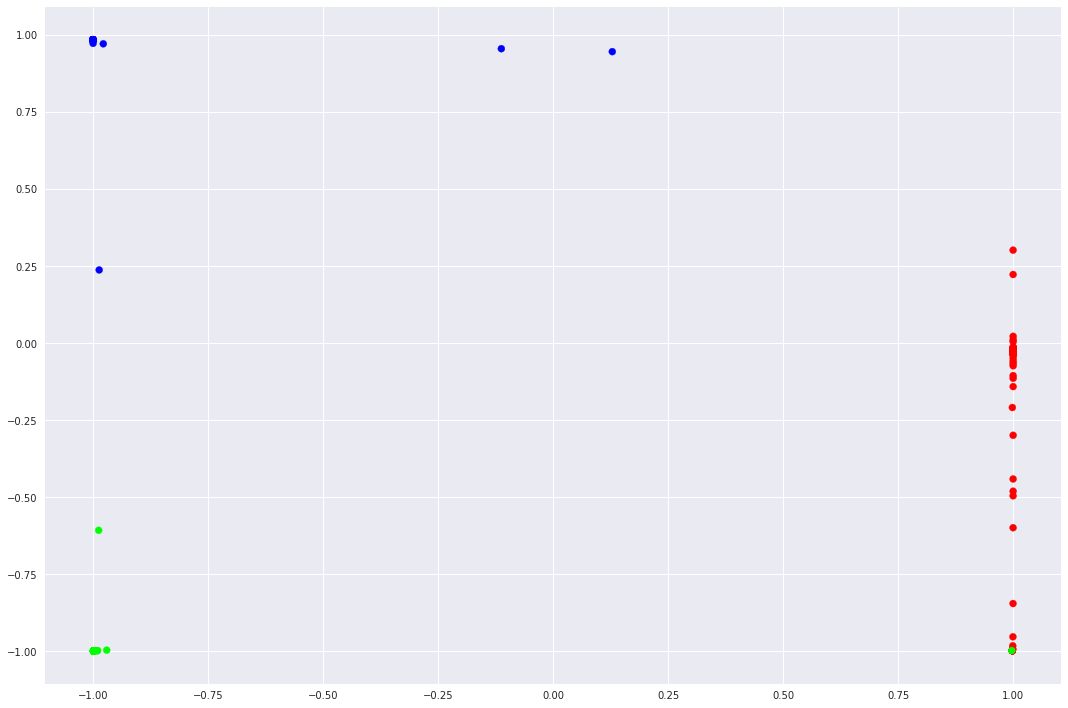

In [93]:
plt.figure(figsize=(15,10))
plt.scatter(features[:, 0], features[:, 1], c=y, cmap='coolwarm')
plt.tight_layout()

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [94]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [95]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5", verbose=1, save_best_only=True)

In [96]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=1, mode='auto')

In [97]:
tendorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state = 42)

In [100]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(X_train, y_train, batch_size=8, epochs=25, 
          verbose=2, validation_split=0.2, 
          validation_data=(X_test, y_test),
         callbacks=[checkpointer, earlystopper, tendorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/25
Epoch 00000: val_loss improved from inf to 0.50706, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.8462 - acc: 0.6210 - val_loss: 0.5071 - val_acc: 0.9630
Epoch 2/25
Epoch 00001: val_loss improved from 0.50706 to 0.21943, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.3430 - acc: 0.9435 - val_loss: 0.2194 - val_acc: 0.9630
Epoch 3/25
Epoch 00002: val_loss improved from 0.21943 to 0.19940, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.1542 - acc: 0.9839 - val_loss: 0.1994 - val_acc: 0.9630
Epoch 4/25
Epoch 00003: val_loss improved from 0.19940 to 0.10999, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.1369 - acc: 0.9758 - val_loss: 0.1100 - val_acc: 0.9815
Epoch 5/25
Epoch 00004: val_loss did not improve
0s - loss: 0.0997 - acc: 0.9839 - val_loss: 0.2361 - val_acc: 0.9259
Epoch 6/25
Epoch 00005: val_loss did not improve
0s - loss: 0.1197 - acc: 0.9516 - val_loss: 0.1773 - val_acc: 0.9444
Epoch 00005: early 